In [110]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


# Creating data to view and fit

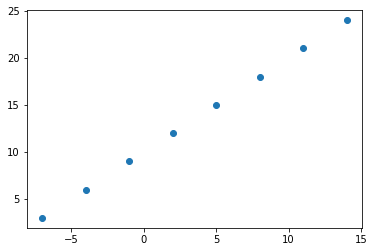

In [111]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3. ,6. ,9. ,12. ,15. ,18.0 ,21. ,24.])

# Visualize it
plt.scatter(X, y)


In [112]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and output shapes

In [113]:
# Create a demo tensor for housing price prediction
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [114]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [115]:
# Turn NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [116]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

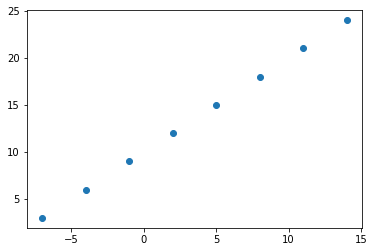

In [117]:
plt.scatter(X, y)

# Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (the function which tells our model how wrong it is) and the optimizer (tells model how to improve the patterns to its learning) and evaluation metrics (what is used to interpret the performance of a model)
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [118]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # SGD = Stochastic Gradient Descent
metrics=['mae']
)

# 3. Fit the model
history = model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.5493 - mae: 10.5493
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 9.7151 - mae: 9.7151
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 9.0089 - mae: 9.0089
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 8.2745 - mae: 8.2745
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 7.5150 - mae: 7.5150
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 5.8979 - mae: 5.8979
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 5.0335 - mae: 5.0335
Epoch 11/100
1/1 [==============================] - 0s 20ms/step 

In [123]:
y_pred = model.predict([18.0])
y_pred

array([[28.09094]], dtype=float32)

## Improving the model

1. **Creating a model** - might add more layers, increase the number of hiddent units (all called neurons), change the activation function of each layer.
2. **Compiling a model** - might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - might fit a model for more **epochs** (leave it training for longer) on or more data (give the model more examples to learn from)

# Evaluating a model

## **Visualize, visualize, visualize**

In [126]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [128]:
# Make labels for the dataset
y= X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

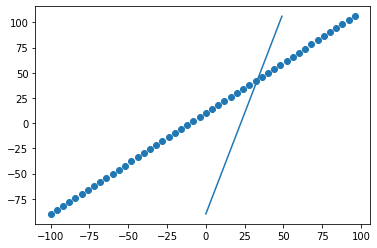

In [132]:
# Visualize the data
plt.scatter(X, y)
plt.plot(y)
plt.show()

## The 3 sets:
* **Training set** - the model learns from this data
* **Validation set** - the model gets tuned on this data (10%-15% of the data available)
* **Test set** - the model gets evaluated on this data to test what it has learned (10%-15% of the total data available)


In [134]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

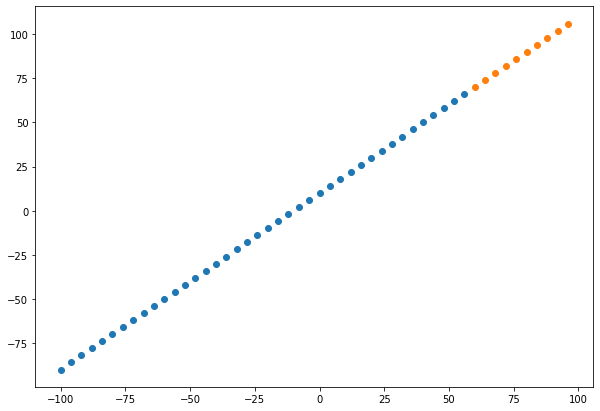

In [137]:
# Visualizing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(['Training Data','Test Data'])